In [1]:
import pandas as pd
import nltk
import numpy as np
import textrank
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import pickle

In [3]:
col_labels = ['Date','AppID','AppName','Lang','1', '2', '3', 'Author','Stars','Title','Review','Reply','Device','DeviceType','Tags','Updated']

In [4]:
df = pd.read_csv('reviews_googleplay_1507788606.csv', 
                  skiprows=4, engine='python', names = col_labels, index_col=False,
                  error_bad_lines=True
                 )

In [5]:
df.head(3)

,Date,AppID,AppName,Lang,1,2,3,Author,Stars,Title,Review,Reply,Device,DeviceType,Tags,Updated
0,\t2017-10-11,com.wachanga.babycare,Baby Breastfeeding Tracker. Newborn Diary,pt,NaN,NaN,NaN,Renato Morais,5,NaN,Muito bom,NaN,NaN,NaN,NaN,NaN
1,\t2017-10-11,com.wachanga.babycare,Baby Breastfeeding Tracker. Newborn Diary,de,NaN,NaN,NaN,NaN,4,NaN,Scheint eine gute App zu sein. Sehr übersichtl...,NaN,NaN,NaN,NaN,NaN
2,\t2017-10-11,com.wachanga.babycare,Baby Breastfeeding Tracker. Newborn Diary,pt,NaN,NaN,NaN,NaN,5,NaN,Perfeito. Consigo controlar todos os dados imp...,NaN,NaN,NaN,NaN,NaN


In [6]:
df_1 = df.drop(['AppID','AppName', '1', '2', '3', 'Device','DeviceType','Tags','Updated'], axis =1)

#col_labels = ['Date',,'Lang', 'Author','Stars','Title','Review','Reply',]

In [659]:
df_1.tail(3)

,Date,Lang,Author,Stars,Title,Review,Reply
3507,\t2015-07-08,ru,Связной Связной,3,NaN,Время после кормления и всего остального показ...,"Здравствуйте! Проверьте, пожалуйста, верный ли..."
3508,\t2015-07-07,ru,Maxim Kolpakov,5,Удобное приложение,"Жена кормит дочку, обязательно фиксируя в этом...",NaN
3509,\t2015-07-04,ru,Роман Муратов,5,NaN,Супруга довольна,Спасибо за отзыв!


In [7]:
df_1.shape

(3510, 7)

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 7 columns):
Date      3510 non-null object
Lang      3510 non-null object
Author    2949 non-null object
Stars     3510 non-null int64
Title     197 non-null object
Review    3510 non-null object
Reply     533 non-null object
dtypes: int64(1), object(6)
memory usage: 192.0+ KB


In [ ]:
#plt.plot(x)

In [214]:
x = df_1.groupby('Lang').Review.count().sort_values(ascending = False)
#sns.distplot(x)

In [215]:
x_Lang = pd.DataFrame(x)

In [216]:
x_Lang.style.bar()

,Review
Lang,
ru,1081
pt,716
es,361
en,356
de,349
fr,122
ko,116
pl,88
it,79


In [ ]:
#chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]


In [622]:
Ru_review = df_1[(df_1.Lang == 'ru')]
Ru_review.shape

(1081, 7)

In [218]:
df.Review[2]

'Perfeito. Consigo controlar todos os dados importantes do meu filho!'

In [ ]:
## trnsl.1.1.20171012T153315Z.27f7b7ad41361c04.5bb573e2c4533a4aeafa7deeba56e203de72b930

In [623]:
from yandex_translate import YandexTranslate
translate = YandexTranslate('trnsl.1.1.20171012T153315Z.27f7b7ad41361c04.5bb573e2c4533a4aeafa7deeba56e203de72b930')
print('Languages:', translate.langs)
print('Translate directions:', translate.directions)
print('Detect language:', translate.detect('Привет, мир!'))
print('Translate:', translate.translate('Привет, мир!', 'ru-en'))  # or just 'en'

Languages: {'bg', 'et', 'fi', 'ru', 'ca', 'hy', 'it', 'lv', 'be', 'az', 'sv', 'uk', 'el', 'sr', 'tr', 'lt', 'hr', 'hu', 'sq', 'es', 'da', 'en', 'mk', 'no', 'sk', 'nl', 'de', 'pt', 'sl', 'cs', 'pl', 'fr', 'ro'}
Translate directions: ['az-ru', 'be-bg', 'be-cs', 'be-de', 'be-en', 'be-es', 'be-fr', 'be-it', 'be-pl', 'be-ro', 'be-ru', 'be-sr', 'be-tr', 'bg-be', 'bg-ru', 'bg-uk', 'ca-en', 'ca-ru', 'cs-be', 'cs-en', 'cs-ru', 'cs-uk', 'da-en', 'da-ru', 'de-be', 'de-en', 'de-es', 'de-fr', 'de-it', 'de-ru', 'de-tr', 'de-uk', 'el-en', 'el-ru', 'en-be', 'en-ca', 'en-cs', 'en-da', 'en-de', 'en-el', 'en-es', 'en-et', 'en-fi', 'en-fr', 'en-hu', 'en-it', 'en-lt', 'en-lv', 'en-mk', 'en-nl', 'en-no', 'en-pt', 'en-ru', 'en-sk', 'en-sl', 'en-sq', 'en-sv', 'en-tr', 'en-uk', 'es-be', 'es-de', 'es-en', 'es-ru', 'es-uk', 'et-en', 'et-ru', 'fi-en', 'fi-ru', 'fr-be', 'fr-de', 'fr-en', 'fr-ru', 'fr-uk', 'hr-ru', 'hu-en', 'hu-ru', 'hy-ru', 'it-be', 'it-de', 'it-en', 'it-ru', 'it-uk', 'lt-en', 'lt-ru', 'lv-en', 'l

In [220]:
text = df.Review[2]
text

'Perfeito. Consigo controlar todos os dados importantes do meu filho!'

## Переведем 10 отзывов для проверки словаря с топ 4-х языков 

### Русский 

In [488]:
m = []
for i in russian_df_total.index:
    m.append(i)
print (len(m))

1081


In [444]:
q_russian={}
for i, elem in enumerate(russ_total):
    q_russian[m[i]] = elem

## Pickle !!!
https://docs.python.org/3/library/pickle.html#examples

In [445]:
with open('q_russian.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(q_russian, f, pickle.HIGHEST_PROTOCOL)

In [307]:
''' with open('q_russian.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    russian_data = pickle.load(f)
'''

In [ ]:
# создадим dataframe где будет оригинальный отзыв и его перевод с яндекса 

In [419]:
russian_df_total = df_1[df_1['Lang'] == 'ru']
len (russian_df_total)

1081

In [424]:
russian_df_1 = df_1[df_1['Lang'] == 'ru']['Review'][0:51]
russian_df_2 = df_1[df_1['Lang'] == 'ru']['Review'][51:101]
russian_df_3 = df_1[df_1['Lang'] == 'ru']['Review'][101:151]
russian_df_4 = df_1[df_1['Lang'] == 'ru']['Review'][151:201]
russian_df_5 = df_1[df_1['Lang'] == 'ru']['Review'][201:251]
russian_df_6 = df_1[df_1['Lang'] == 'ru']['Review'][251:301]
russian_df_7 = df_1[df_1['Lang'] == 'ru']['Review'][301:351]
russian_df_8 = df_1[df_1['Lang'] == 'ru']['Review'][351:401]
russian_df_9 = df_1[df_1['Lang'] == 'ru']['Review'][401:451]
russian_df_10 = df_1[df_1['Lang'] == 'ru']['Review'][451:501]
russian_df_11 = df_1[df_1['Lang'] == 'ru']['Review'][501:551]
russian_df_12 = df_1[df_1['Lang'] == 'ru']['Review'][551:601]
russian_df_13 = df_1[df_1['Lang'] == 'ru']['Review'][601:651]
russian_df_14 = df_1[df_1['Lang'] == 'ru']['Review'][651:701]
russian_df_15 = df_1[df_1['Lang'] == 'ru']['Review'][701:751]
russian_df_16 = df_1[df_1['Lang'] == 'ru']['Review'][751:801]
russian_df_17 = df_1[df_1['Lang'] == 'ru']['Review'][801:851]
russian_df_18 = df_1[df_1['Lang'] == 'ru']['Review'][851:901]
russian_df_19 = df_1[df_1['Lang'] == 'ru']['Review'][901:951]
russian_df_20 = df_1[df_1['Lang'] == 'ru']['Review'][951:1001]
russian_df_21 = df_1[df_1['Lang'] == 'ru']['Review'][1001:1051]
russian_df_22 = df_1[df_1['Lang'] == 'ru']['Review'][1051:]

In [425]:
russ_1 = translate.translate(russian_df_1, 'ru-en')['text']

In [360]:
russ_2 = translate.translate(russian_df_2, 'ru-en')['text']

In [361]:
russ_3 = translate.translate(russian_df_3, 'ru-en')['text']

In [362]:
russ_4 = translate.translate(russian_df_4, 'ru-en')['text']

In [363]:
russ_5 = translate.translate(russian_df_5, 'ru-en')['text']

In [364]:
russ_6 = translate.translate(russian_df_6, 'ru-en')['text']

In [365]:
russ_7 = translate.translate(russian_df_7, 'ru-en')['text']

In [366]:
russ_8 = translate.translate(russian_df_8, 'ru-en')['text']

In [367]:
russ_9 = translate.translate(russian_df_9, 'ru-en')['text']

In [368]:
russ_10 = translate.translate(russian_df_10, 'ru-en')['text']

In [369]:
russ_11 = translate.translate(russian_df_11, 'ru-en')['text']

In [370]:
russ_12 = translate.translate(russian_df_12, 'ru-en')['text']

In [371]:
russ_13 = translate.translate(russian_df_13, 'ru-en')['text']

In [372]:
russ_14 = translate.translate(russian_df_14, 'ru-en')['text']

In [373]:
russ_15 = translate.translate(russian_df_15, 'ru-en')['text']

In [374]:
russ_16 = translate.translate(russian_df_16, 'ru-en')['text']

In [375]:
russ_17 = translate.translate(russian_df_17, 'ru-en')['text']

In [376]:
russ_18 = translate.translate(russian_df_18, 'ru-en')['text']

In [377]:
russ_19 = translate.translate(russian_df_19, 'ru-en')['text']

In [378]:
russ_20 = translate.translate(russian_df_20, 'ru-en')['text']

In [379]:
russ_21 = translate.translate(russian_df_21, 'ru-en')['text']

In [380]:
russ_22 = translate.translate(russian_df_22, 'ru-en')['text']

In [491]:
russ_total_lists = russ_1 + russ_2 + russ_3 + russ_4 + russ_5\
                + russ_6 + russ_7 + russ_8 + russ_9 + russ_10\
                + russ_11 + russ_12 + russ_13 + russ_14 + russ_15\
                + russ_16+ russ_17 +russ_18 +russ_19+ russ_20 +russ_21 + russ_22

## переводим весь текст в нижний регитр 

In [662]:
russ_total_lists_lower=[i.lower() for i in russ_total_lists]

In [665]:
with open('russ_total_lists_lower.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(russ_total_lists_lower, f, pickle.HIGHEST_PROTOCOL)

In [9]:
with open('russ_total_lists_lower.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    russ_total_lists_lower = pickle.load(f)

In [10]:
len (russ_total_lists_lower)

1081

In [533]:
#russian_se = pd.Series(russian['text']) 

In [489]:
#str_total_text_ru = ''.join(russ_total)

In [ ]:
'''
сохранить текст в список 

tokenizer=lambda x: x
pickle

https://docs.python.org/3/library/pickle.html#examples
https://docs.python.org/3/library/pickle.html

1 весь текст - text rank в каждом отзыве 
2 подаем векторизатору на вход список списков - где первый элемент список ключевых слов 1-го отзыва
3 запускаем кластеризации 
4 получаем кластеры с группой отзывов - смотрим их интерпретацию 


2 векторизиируем каждый текст - строки отзывы, колонки - ключевые слова из text rank 
Vectorizer 
fit tranform (есть подсчет слов) - подать список ключевых слов, в качестве токенизации указать функцию, 
которая берет на вход 
tokenizer - должен взять список и отдать список (вместо взять сплошной текст и отдать список слов)

составляем список из ключевых слов

# Каждый текст это точка в пространстве признаков, а признаки - это наличие ключевого слова 
# У нас 4 кластера. Показываем к какому кластеру относится текст  

# до текст ранка привести в нижний регистрё - ok 
# из списка ключевых слов выкинуть стопслова после текст ранк - забрать все, кроме стопслова (stop слов ) - ok
# nltk.stopwords("english")
# dic - ключ - номер кластера, значения  - тексты 
# importa - [11.11.17, 14:58:40] Max Ionov: collections.defaultdict(list)
# l = collections.defaultdict(list)

# 1 эксперимент - ok 
# как сейчас 
# 2 эксперимент - без выделения ключевых слов  - ok

'''

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

In [12]:
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

In [13]:
len(stop_words)

167

In [16]:
key_phrases = []
for i in russ_total_lists_lower:
    y = [b for b in textrank.extract_key_phrases(i) if b not in stop_words]
    key_phrases.append(y)

In [17]:
len(key_phrases)

1081

In [754]:
count = 0
for i in key_phrases:
    if 'app' in i:
        count +=1
print (count)

78


In [755]:
key_phrases[0:5]

[['everything', 'harmonious', 'much', 'thank'],
 ['application', 'example', 'information', 'attention', 'sleep'],
 ['beginning', 'completion', 'dream', 'walk'],
 ['simple'],
 ['super']]

In [613]:
# Сохраняем данные на диске в формате python списка 

In [756]:
with open('key_phrases.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(key_phrases, f, pickle.HIGHEST_PROTOCOL)

In [18]:
with open('key_phrases.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    key_phrases = pickle.load(f)

## Эксперимент 1 Text Rank

##  Векторизация 

In [19]:
import sklearn.feature_extraction.text
vctr = sklearn.feature_extraction.text.CountVectorizer(tokenizer = lambda key_phrases: key_phrases, preprocessor=lambda key_phrases: key_phrases)

# tokenizer = lambda key_phrases: key_phrases - должен взять список и отдать список 
#(вместо взять сплошной текст и отдать список слов)
# preprocessor=lambda x: x - должен взять список и отдать список

In [673]:
# list(' '.join(i) for i in key_phrases[:5])

In [20]:
X_train = vctr.fit_transform(key_phrases) # скармливаем весь текст ключевых слов 

In [21]:
# Почему 782 - ключевые слова, 1081 - набор ключевых слов для каждого текста 
X_train.shape

(1081, 777)

## Кластеризация 

In [22]:
from sklearn.cluster import KMeans

In [608]:
# Выбираем оптимальное кол-во кластеров 

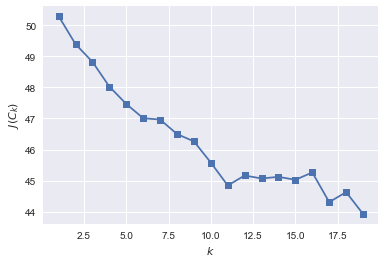

In [23]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$') # количество кластеров 
plt.ylabel('$J(C_k)$'); # среднее расстояние до центроидов 

In [45]:
clf_kmeans = KMeans(n_clusters=10)

# можно выдать 3 самых центральных отзыва и общие ключевые слова между ними 
# 3 - максимально близких к центру - из них выбрать топ 3 пересекающиеся отзывы, а потом все 
#https://stackoverflow.com/questions/39766593/get-element-closest-to-cluster-centroid
#https://stackoverflow.com/questions/21660937/get-nearest-point-to-centroid-scikit-learn
# для каждого кластера выделить 3-5 максимально близких текста 
# из них выбрать топ 3 ключевых слова, которые перекаются
# если нет, топ 3-5 повторяющихся из всего кластера 


In [799]:
# Передаем в модель все данные 

In [46]:
clusters_kmeans = clf_kmeans.fit_predict(X_train)

In [47]:
clusters_kmeans.shape

(1081,)

In [48]:
kmeans.labels_

array([ 6, 17,  0, ...,  6, 17,  0], dtype=int32)

## Почему 19 центроидов? 

In [49]:
centroids = kmeans.cluster_centers_

In [50]:
print (centroids)

[[ 0.          0.00208768  0.         ...,  0.          0.00208768  0.        ]
 [ 0.          0.          0.00671141 ...,  0.          0.          0.00671141]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.01538462  0.          0.         ...,  0.01538462  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [51]:
centroids.shape

(19, 777)

In [52]:
X_train.shape

(1081, 777)

https://stackoverflow.com/questions/45234336/value-at-kmeans-cluster-centers-in-sklearn-kmeans

In [877]:
closest, _ = pairwise_distances_argmin_min(centroids, X_train)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2078 while Y.shape[1] == 777

In [ ]:
#d = km.transform(X)[:, j] - пример 
#d = clusters_kmeans.transform(X_train)[:, j] #Transform X to a cluster-distance space.

In [828]:
from sklearn.metrics import pairwise_distances_argmin_min
#X = np.random.randn(10, 4)
#km = KMeans(n_clusters=2).fit(X)

In [846]:
# https://stackoverflow.com/questions/44041347/sklearn-get-distance-from-point-to-nearest-cluster

from sklearn.metrics.pairwise import pairwise_distances

dist_matrix = pairwise_distances(X_train)
# надо взять точки только для одного кластера, посчитать среднее значение одного кластера и поставить его как Y) 


In [847]:
dist_matrix

array([[ 0.        ,  3.        ,  2.82842712, ...,  2.23606798,
         2.44948974,  2.23606798],
       [ 3.        ,  0.        ,  3.        , ...,  2.82842712,
         2.23606798,  2.44948974],
       [ 2.82842712,  3.        ,  0.        , ...,  2.64575131,
         2.44948974,  2.23606798],
       ..., 
       [ 2.23606798,  2.82842712,  2.64575131, ...,  0.        ,
         2.23606798,  2.        ],
       [ 2.44948974,  2.23606798,  2.44948974, ...,  2.23606798,
         0.        ,  1.        ],
       [ 2.23606798,  2.44948974,  2.23606798, ...,  2.        ,
         1.        ,  0.        ]])

In [ ]:
# центроид - среднее значение расстояний в одном классе 
# разница - между центроидом и длиной расстояний - это классифицировать по уменьшению 


In [855]:
clusters_kmeans[0:5]

array([1, 3, 0, 0, 0], dtype=int32)

In [858]:
print (X_train[0:10])

  (0, 247)	1
  (0, 315)	1
  (0, 424)	1
  (0, 680)	1
  (1, 44)	1
  (1, 52)	1
  (1, 250)	1
  (1, 347)	1
  (1, 626)	1
  (2, 77)	1
  (2, 155)	1
  (2, 220)	1
  (2, 748)	1
  (3, 622)	1
  (4, 664)	1
  (6, 161)	1
  (7, 345)	1
  (7, 731)	1
  (8, 305)	1
  (8, 622)	1


In [860]:
key_phrases[0:10]

[['everything', 'harmonious', 'much', 'thank'],
 ['application', 'example', 'information', 'attention', 'sleep'],
 ['beginning', 'completion', 'dream', 'walk'],
 ['simple'],
 ['super'],
 [],
 ['convenient'],
 ['utility', 'inexperienced'],
 ['graphs', 'simple'],
 []]

In [861]:
for point in key_phrases:
    distances = []
    for cluster in clusters_kmeans:
        distance = dist_matrix[point, cluster].min()  # Single linkage - что значит single? 
        distances.append(distance)
    print("The cluster for {} is {}".format(point, cluster))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
for point in unclustered_points:
    distances = []
    for cluster in clusters:
        distance = dist_matrix[point, cluster].min()  # Single linkage
        distances.append(distance)
    print("The cluster for {} is {}".format(point, cluster)

In [ ]:
'''
closest, _ = pairwise_distances_argmin_min(clusters_kmeans.cluster_centers_, X_train)
closest
'''

In [ ]:
''' 
https://stackoverflow.com/questions/21660937/get-nearest-point-to-centroid-scikit-learn

>>> from sklearn.metrics import pairwise_distances_argmin_min
>>> X = np.random.randn(10, 4)
>>> km = KMeans(n_clusters=2).fit(X)
>>> closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
>>> closest
array([0, 8])

https://stackoverflow.com/questions/26795535/output-50-samples-closest-to-each-cluster-center-using-scikit-learn-k-means-libr

If you have the distance to center values in a list, you can use sort.


results = [(distance_to_center, (x, y)), (distance_to_center, (x, y)), ...]
results.sort()
# get closest 50
closest_fifty = results[:50]



http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

'''

In [781]:
from collections import defaultdict

In [764]:
# 3 эксперимент - Rake -
# дополнительно можно оценить тональности по словарю положительных отзывов -потом 

In [816]:
# Создаем словарь - номер кластера это ключ, а значение - это текст (отзыв), который соответствует кластеру 
dict_cl = defaultdict(list)
for i, elem in enumerate(clusters_kmeans):
    dict_cl[elem].append(russ_total_lists_lower[i])

In [817]:
len(dict_cl)

11

In [818]:
dict_cl[10]

['very simple and easy, i poolboys*！',
 "cons, haven't really noticed very easy in principle.",
 'very easy and simple',
 'very convenient and easy. thank you.',
 'easy to use. i liked it.',
 'easy to use and understand',
 'very easy and intuitive program',
 'making it easy for me maintenance mode)',
 'easy to use and understand all',
 'very easy to use program!!!',
 'i liked it! easy and fun to use!',
 'very easy to use and understand',
 'simple, easy, free!',
 'an easy and convenient application',
 'i really liked this app. very easy to use.']

In [832]:
# Создаем словарь - номер кластера это ключ, а значение - это текст (отзыв), который соответствует кластеру 
dict_kp = defaultdict(list)
for i, elem in enumerate(clusters_kmeans):
    dict_kp[elem].append(key_phrases[i])

In [838]:
dict_kp[10][0]

['separate button',
 'necessary',
 'possible',
 'current',
 'upgrade',
 'opinion',
 'useful',
 'default',
 'program feeding',
 'opportunity',
 'feeding']

In [ ]:
# сделать топ 3 - idf 
# количество отзывов 

## Определим ближайшие точки к центроидам

## Эксперимент 2 Без выделения ключевых слов RANK 

In [822]:
import sklearn.feature_extraction.text
vctr1 = sklearn.feature_extraction.text.CountVectorizer()

In [823]:
X_train1 = vctr1.fit_transform(russ_total_lists_lower) # скармливаем весь текст ключевых слов 

In [824]:
X_train1.shape

(1081, 2078)

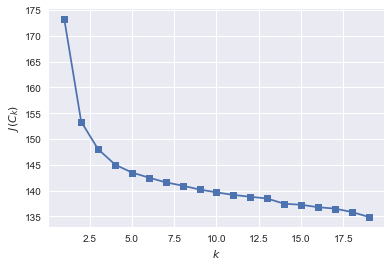

In [825]:
inertia1 = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train1)
    inertia1.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia1, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [826]:
clf_kmeans1 = KMeans(n_clusters=12)

In [827]:
clusters_kmeans1 = clf_kmeans1.fit_predict(X_train1)

## Идеи 

In [ ]:
# сравнить с обычным IDF - посчитать - выявить самые важные темы и как часто встречаются - story impact, а потом группируем их 

# латентная модель - для поиска схожих текстов !!! 

# гугл для латинских языков 

# после textrank можно попробовать rake и сравнить результат
# обогатить словарь - word net или word2vec - (за счет краулинга ключевых слов - только для существительных - NLTK - анализатор)
# сравнить text rank и мешок слов обычный 

## Португальский 

In [227]:
portugalian_df = df_1[df_1['Lang'] == 'pt'][:50]

In [228]:
portugalian_df_translate = portugalian_df['Review']

In [229]:
portugalian = translate.translate(portugalian_df_translate, 'pt-en')

In [230]:
portugalian_se = pd.Series(portugalian['text']) 

In [231]:
portugalian_df['English'] = portugalian_se

In [248]:
portugalian_df.head(5)

,Date,Lang,Author,Stars,Title,Review,Reply,English
0,\t2017-10-11,pt,Renato Morais,5,NaN,Muito bom,NaN,Very good
2,\t2017-10-11,pt,NaN,5,NaN,Perfeito. Consigo controlar todos os dados imp...,NaN,I switched cell phone and I lost all records o...
5,\t2017-10-11,pt,Larissa Campos,4,NaN,Troquei de celular e perdi todos os registros ...,NaN,Very good
7,\t2017-10-10,pt,NaN,5,NaN,Muito bom consigo amamentar minha bebe nas hor...,NaN,"I loved it, helps me a lot, to me organize and..."
10,\t2017-10-10,pt,NaN,5,NaN,Me ajuda muito no controle de mamadas e fralda...,NaN,Very nice application I love it


## Испанский

In [233]:
spanish_df = df_1[df_1['Lang'] == 'es'][:50]

In [234]:
spanish_df_translate = spanish_df['Review']

In [235]:
spanish = translate.translate(spanish_df_translate, 'es-en')

In [236]:
spanish_se = pd.Series(spanish['text']) 

In [237]:
spanish_df['English'] = spanish_se

In [238]:
spanish_df.head() # почему не совпадает ???

,Date,Lang,Author,Stars,Title,Review,Reply,English
4,\t2017-10-11,es,NaN,5,NaN,Excelente,NaN,To find out your schedule and create a routine...
13,\t2017-10-10,es,NaN,5,NaN,Muy buena!,NaN,"The app has many functions, but you need to ha..."
19,\t2017-10-10,es,cyntiahartmann,5,NaN,Muy útil,NaN,Very useful!
48,\t2017-10-08,es,Sandra Vallejo,5,NaN,Muy útil. Acabo de tener un bebé y me viene fe...,NaN,How do I make a backup of my data saved in thi...
51,\t2017-10-07,es,Yohana Sosa,4,NaN,Para saber sus horarios y crear una rutina con...,NaN,NaN


## Немецкий

In [239]:
german_df = df_1[df_1['Lang'] == 'de'][:50]

In [240]:
german_df_translate = german_df['Review']

In [241]:
german = translate.translate(german_df_translate, 'de-en')

In [242]:
german_se = pd.Series(german['text']) 

In [243]:
german_df['English'] = german_se

In [244]:
german_df.head()

,Date,Lang,Author,Stars,Title,Review,Reply,English
1,\t2017-10-11,de,NaN,4,NaN,Scheint eine gute App zu sein. Sehr übersichtl...,NaN,"Everything was great, great App for everything..."
9,\t2017-10-10,de,NaN,4,NaN,"Alles super, klasse App für alles Wichtige. Di...",NaN,Super App can👍need with all you!
24,\t2017-10-09,de,Jenny Löhndorf,4,NaN,"App, die alles hat, was man braucht. Stilltime...",NaN,"App has all the Fubktionieren, you need to kee..."
25,\t2017-10-09,de,Francesca Barbaro,5,NaN,Finde die App super...vergesse nämlich oft wan...,NaN,Great App that is easy to handle and a good Ov...
66,\t2017-10-07,de,Eva-Maria Mäßig,5,NaN,Ich finde die App sehr gut. Vor allem weil man...,NaN,NaN


## Соединяем dataframes 

In [245]:
frames = [russian_df, portugalian_df, spanish_df, german_df]

In [246]:
result = pd.concat(frames)

In [247]:
result

,Date,Lang,Author,Stars,Title,Review,Reply,English
3,\t2017-10-11,ru,Eva Lollipop,5,NaN,"Огромное спасибо, за ваш труд! Это лучше прило...",NaN,"Simple, convenient, no ads almost"
11,\t2017-10-10,ru,Ирина Фатурова,3,NaN,Приложение некорректно отображает информацию в...,NaN,Very handy app）
12,\t2017-10-10,ru,Анна Ромас,4,NaN,Почему-то прогулку стало выставлять сразу окон...,NaN,"The app is user friendly, everything you need ..."
15,\t2017-10-10,ru,Екатерина Артеменкова,5,NaN,"Просто, удобно, без рекламы почти",NaN,"The app is good, use regularly for 4 months. T..."
16,\t2017-10-10,ru,Елена Кадрова,5,NaN,Супер! Очень выручает!,NaN,I like this app! Very convenient version.
26,\t2017-10-09,ru,Anna Babashina,4,NaN,Хотелось бы расшифровки в графиках при нажатии...,NaN,Great app! Without in any way! Everything is t...
27,\t2017-10-09,ru,Инна Борщ,5,NaN,очень удобно,NaN,I personally very helpful app!)
28,\t2017-10-09,ru,Алиса Януш,5,NaN,"Нравится приложение, как неопытная мамочка веч...",NaN,The app is super! To me it is very helpful to ...
29,\t2017-10-09,ru,Элиза Дорохова,5,NaN,"Супер приложение, когда не надо заморачиваться...",NaN,Very handy app
38,\t2017-10-08,ru,Ali Ali,5,NaN,Круто,NaN,The app is extremely helpful! One big disadvan...
